## Очистка данных. Закрепление

In [13]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Считывание данных
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


Признаки дата-сета
- Pregnancies — количество беременностей.
- Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
- BloodPressure — диастолическое артериальное давление (мм рт. ст.).
- SkinThickness — толщина кожной складки трицепса (мм).
- Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
- BMI — индекс массы тела
- DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
- Age — возраст.
- Outcome — наличие диабета (0 — нет, 1 — да).

In [15]:
#diabetes.head()
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
'''
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes = diabetes.drop_duplicates()
def low_informative_feature(data):
    low_information_cols = []
    for col in data.columns:
        top_freq = data[col].value_counts(normalize=True).max()
        nunique_ratio = data[col].nunique() / data[col].count()
        if top_freq > 0.95:
            low_information_cols.append(col)
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes)
diabetes = diabetes.drop(low_information_cols, axis=1)
diabetes.info()
'''

In [ ]:
'''
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
#print(diabetes.shape[1])
diabetes.info()
'''

In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


Задание 8.1 <br>
Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [ ]:
#diabetes = diabetes.drop_duplicates()
#diabetes

In [17]:
#создаем список наименование колонок и удаляем индекс
diabetes_cols = list(diabetes.columns)
#diabetes_cols.remove('id')

# создаем маску дубликатов и выводим количество повторяющихся строк
mask=diabetes.duplicated(subset=diabetes_cols)
diabetes_dupl=diabetes[mask]
display(f'Число повторяющихся строк: {diabetes_dupl.shape[0]}')

'Число повторяющихся строк: 10'

In [18]:
# Удаляем дубликаты строк
diabetes_clear = diabetes.drop_duplicates(subset=diabetes_cols)
display(f'Количество строк после удаления дубликатов: {diabetes_clear.shape[0]}')

'Количество строк после удаления дубликатов: 768'

Возможный вариант решения <br>
duplicates = diabetes[diabetes.duplicated()]<br>
print('Число дубликтов: {}'.format(duplicates.shape[0]))<br><br>
diabetes = diabetes.drop_duplicates()<br>
print('Результирующее число записей: {}'.format(diabetes.shape[0]))

Задание 8.2 <br>
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [ ]:
#diabetes['Pregnancies'].value_counts(normalize=False)#.max()

In [ ]:
#diabetes_clear = diabetes
# поиск неинформативных признаков. Т.е. смотрим по каждому столбцу сколько в нём одинаковых значений и уникальных значений в процентном выражении.
# если одинаковых либо уникальных значений в столбце более 95%, то это НЕИНФОРМАТИВНЫЙ признак
'''
low_information_cols = []
for col in diabetes_clear.columns:
    # частота одинаковых значений в (%)
    top_fraq = diabetes_clear[col].value_counts(normalize=True).max()
    #display(top_fraq)
    nunique_ratio = diabetes_clear[col].nunique() / diabetes_clear[col].count()
    if (top_fraq > 0.95):
        low_information_cols.append(col)
    if (nunique_ratio > 0.95):
        low_information_cols.append(col)
        
display(low_information_cols)
'''

In [ ]:
#удаляем "неинформативный" признак

#diabetes_clear = diabetes_clear.drop(low_information_cols, axis=1)
#diabetes_clear.info()

In [21]:
def low_informative_feature(data):
    low_information_cols = []
    for col in data.columns:
        top_freq = data[col].value_counts(normalize=True).max()
        nunique_ratio = data[col].nunique() / data[col].count()
        if top_freq > 0.95:
            low_information_cols.append(col)
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes_clear)
diabetes_clear = diabetes_clear.drop(low_information_cols, axis=1)
diabetes_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Возможное решение<br>
def low_informative_feature(data):<br>
        low_information_cols = []<br>
        for col in data.columns:<br>
            top_freq = data[col].value_counts(normalize=True).max()<br>
            nunique_ratio = data[col].nunique() / data[col].count()<br>
            if top_freq > 0.95:<br>
                low_information_cols.append(col)<br>
            if nunique_ratio > 0.95:<br>
                low_information_cols.append(col)<br>
        return low_information_cols<br>
    low_information_cols = low_informative_feature(diabetes)<br>
print(low_information_cols)

Задание 8.3 <br>
Попробуйте найти пропуски в данных с помощью метода isnull()

In [22]:
diabetes_clear.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [ ]:
# меняем все нули в DataFrame на NaN
#diabetes_nan = diabetes_clear.replace(0, np.nan)
#diabetes_nan.info()

#
#display('Доля пропусков в Insulin: {}'.format(diabetes_nan['Insulin'].isnull().mean().round(2)))
#print('Результирующее число записей: {}'.format(diabetes.shape[0]))

In [25]:
def nan_function(x):
    return np.nan if x == 0 else x
diabetes_clear["Glucose"] = diabetes_clear["Glucose"].apply(nan_function)
diabetes_clear["BloodPressure"] = diabetes_clear["BloodPressure"].apply(nan_function)
diabetes_clear["SkinThickness"] = diabetes_clear["SkinThickness"].apply(nan_function)
diabetes_clear["Insulin"] = diabetes_clear["Insulin"].apply(nan_function)
diabetes_clear["BMI"] = diabetes_clear["BMI"].apply(nan_function)
thresh = diabetes_clear.shape[0]*0.7
diabetes_nan = diabetes_clear.dropna(thresh=thresh, axis=1)
print(diabetes_nan.shape[1])
#diabetes_nan.info()

8


Альтеранативное решение<br>
def nan_function(x):<br>
    return np.nan if x == 0 else x<br>
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)<br>
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)<br>
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)<br>
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)<br>
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)<br><br>
diabetes.isnull().mean().round(2).sort_values(ascending=False)<br>

Задание 8.4
<br>Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [26]:
# Проверяем какие признаки должны будут удалиться
diabetes_nan.isnull().mean().round(4).sort_values(ascending=False)

SkinThickness               0.2956
BloodPressure               0.0456
BMI                         0.0143
Glucose                     0.0065
Pregnancies                 0.0000
DiabetesPedigreeFunction    0.0000
Age                         0.0000
Outcome                     0.0000
dtype: float64

In [27]:
diabetes_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [28]:
# Удаляем строки с пропусками более 30% через  thresh
thresh = diabetes_nan.shape[0] * 0.7
diabetes_dropna = diabetes_nan.dropna(thresh=thresh, axis=1)
diabetes_dropna.info()

print(diabetes_dropna.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB
8


Задание 8.5 <br>
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [29]:
msk = diabetes_dropna.shape[1]
diabetes_dropna = diabetes_dropna.dropna(thresh=msk-2, axis=0)
print(diabetes_dropna.shape[0])

761


In [ ]:
msk

Задание 8.6<br>
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [30]:
# вычисляем количество пропущенных значений в каждом столбце
null = diabetes_dropna.isnull().sum()

# формируем список наименований столбцов, где есть пропущенные значения, то есть сумма больше нуля
col = null[null>0].index

# в цикле в каждом столбеце из списка столбцов col вычисляем медиану и через fillna заполняем медианой нуелвые значения
for i in col:
    diabetes_dropna[i] = diabetes_dropna[i].fillna(diabetes_dropna[i].median())
print(diabetes_dropna['SkinThickness'].mean().round(1))


29.1


 Задание 8.7<br>
 Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


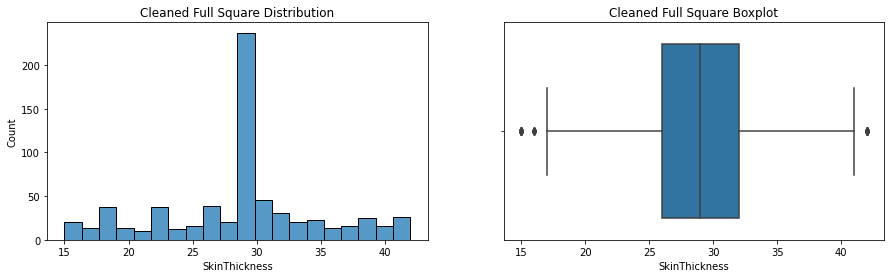

In [35]:
#Квантили вычисляются с помощью метода quantile().
#Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.
#Функция по отображению квартилей
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#Применим функцию и выявим число выбросов
outliers, cleaned = outliers_iqr(diabetes_dropna, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Строим гистограмму и коробчатую диаграммы

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');


 Задание 8.8<br>
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [45]:
def outliers_z_score_mod(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - sigma * left
    upper_bound = mu + sigma * right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#Применим эту функцию к таблице diabetes_dropna и признаку SkinThickness, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score_mod(diabetes_dropna, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 101
Результирующее число записей: 660


 Задание 8.9<br>
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.<br>
<img src="data\dst-3-unit-1-mod-14-35.png" width="400">

In [50]:
#Квантили вычисляются с помощью метода quantile().
#Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.
#Функция по отображению квартилей
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#Применим эту функцию к таблице diabetes_dropna и признаку DiabetesPedigreeFunction, а также выведем размерности результатов:
outliers, _ = outliers_iqr_mod(diabetes_dropna, 'DiabetesPedigreeFunction', log_scale=False)
outliers_log, _ = outliers_iqr_mod(diabetes_dropna, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Разность: {outliers.shape[0] - outliers_log.shape[0]}')


Разность: 29
